In [1]:
# Author Davide Aloi
# Description: define sphere ROIs based on coordinates / radius. Plot bold signal over time 

import numpy as np
import glob
import nilearn
from nilearn import image
from nilearn import input_data
import matplotlib.pyplot as plt
import pandas as pd

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
c:\Users\davide\miniconda3\envs\neuroimg\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
c:\Users\davide\miniconda3\envs\neuroimg\lib\site-packages\nilearn\datasets\__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [26]:
def plot_interrupted_ts(ts, regr):
    for i in range(0, len(ts)-1):
        if regr[i] != 0:
            plt.plot([i,i+1], [ts[i],ts[i+1]],  linestyle="-", color = 'black')
        else:
            plt.plot([i,i+1], [ts[i],ts[i+1]],  linestyle="-", color = 'black', alpha = 0.2)

In [54]:
def plot_time_series_from_sphere(scan, events, events2, coord, mm, title, rp = None, detrend = False): 
    from matplotlib import lines
    import matplotlib.pyplot as plt
    from nilearn import input_data
    from matplotlib.pyplot import figure
    figure(figsize=(12, 6), dpi=160)


    # Coordinate of the sphere to extract
    # Creating Mask
    seed_masker = input_data.NiftiSpheresMasker([coord], radius=mm,
                                                detrend = detrend,
                                                memory='nilearn_cache', memory_level=1,
                                                verbose=0)

    # Extracting time series (mean)
    seed_time_series = seed_masker.fit_transform(scan)
        
    # plot time series
    if rp is None:
        plt.plot(seed_time_series)
    else:
        plot_interrupted_ts(seed_time_series, rp)
        plt.ylim(np.min(seed_time_series[rp ==1])-5, np.max(seed_time_series[rp ==1])+5)

    # plotting onsets
    for i, e in enumerate(events):
        plt.axvline(x=e, color='r', linestyle=':', alpha = 0.8, linewidth = 0.8)

    for i, e in enumerate(events2):
        plt.axvline(x=e, color='b', linestyle=':', alpha = 0.8, linewidth = 0.8)

    plt.tight_layout()
    # adding legend
    lgd = []
    #lgd.append(lines.Line2D([0,0],[0,1], color = 'black', linestyle='-', alpha = 1, linewidth = 0.8, label = 'Seed BOLD'))
    lgd.append(lines.Line2D([0,0],[0,1], color = 'black', linestyle='-', alpha = 0.2, linewidth = 1, label = 'Excluded vols.'))
    lgd.append(lines.Line2D([0,0],[0,1], color = 'red', linestyle=':', alpha = 1, linewidth = 1, label = 'Move'))
    lgd.append(lines.Line2D([0,0],[0,1], color = 'blue', linestyle=':', alpha = 1, linewidth = 1, label = 'Relax'))
    plt.legend(handles = lgd)

    # adding title
    plt.title(title)
    plt.xlabel('Scan number')
    plt.ylabel('Signal')    

In [4]:
# p01
# Volumes where the "move" event occurs (1.77 is the RT)
events = np.divide([35.5, 115.7, 195.8, 275.8, 355.9], 1.77).astype(int)
events_relax = np.divide([2.07,	82.18, 162.21,	242.24, 322.26], 1.77).astype(int)

# w02 d01 pre
f = 'D:\\Raindrop_data\\p01\\p01_w02\\day01\\fmri_data\\JOYSTICK_BASELINE_0015\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data1 = image.load_img(scan)
rp1 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w02 d01 post
f = 'D:\\Raindrop_data\\p01\\p01_w02\\day01\\fmri_data\\JOYSTICK_POST_0019\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data2 = image.load_img(scan)
rp2 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w02 d05 pre
f = 'D:\\Raindrop_data\\p01\\p01_w02\\day05\\fmri_data\\\JOYSTICK_BASELINE_0005\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data3 = image.load_img(scan)
rp3 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w02 d05 post
f = 'D:\\Raindrop_data\\p01\\p01_w02\\day05\\fmri_data\\\JOYSTICK_POST_0010\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data4 = image.load_img(scan)
rp4 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w04 d01 pre
f = 'D:\\Raindrop_data\\p01\\p01_w04\\day01\\fmri_data\\JOYSTICK_BASELINE_0005\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data5 = image.load_img(scan)
rp5 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w04 d01 post
f = 'D:\\Raindrop_data\\p01\\p01_w04\\day01\\fmri_data\\JOYSTICK_POST_0009\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data6 = image.load_img(scan)
rp6 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w04 d05 pre
f = 'D:\\Raindrop_data\\p01\\p01_w04\\day05\\fmri_data\\JOYSTICK_BASELINE_0005\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data7 = image.load_img(scan)
rp7 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w04 d05 post
f = 'D:\\Raindrop_data\\p01\\p01_w04\\day05\\fmri_data\\JOYSTICK_POST_0009\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data8 = image.load_img(scan)
rp8 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w06 d01 pre
f = 'D:\\Raindrop_data\\p01\\p01_w06\\day01\\fmri_data\\JOYSTICK_BASELINE_0005\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data9 = image.load_img(scan)
rp9 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w06 d01 post
f = 'D:\\Raindrop_data\\p01\\p01_w06\\day01\\fmri_data\\JOYSTICK_POST_0009\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data10 = image.load_img(scan)
rp10 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w06 d05 pre
f = 'D:\\Raindrop_data\\p01\\p01_w06\\day05\\fmri_data\\JOYSTICK_BASELINE_0005\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data11 = image.load_img(scan)
rp11 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

# w06 d05 post
f = 'D:\\Raindrop_data\\p01\\p01_w06\\day05\\fmri_data\\JOYSTICK_POST_0009\\nifti\\'
scan = glob.glob(f + 'sr*.nii')[0]
scan_data12 = image.load_img(scan)
rp12 = np.asarray(pd.read_csv(glob.glob(f+'regr.txt')[0], header = None)[6])

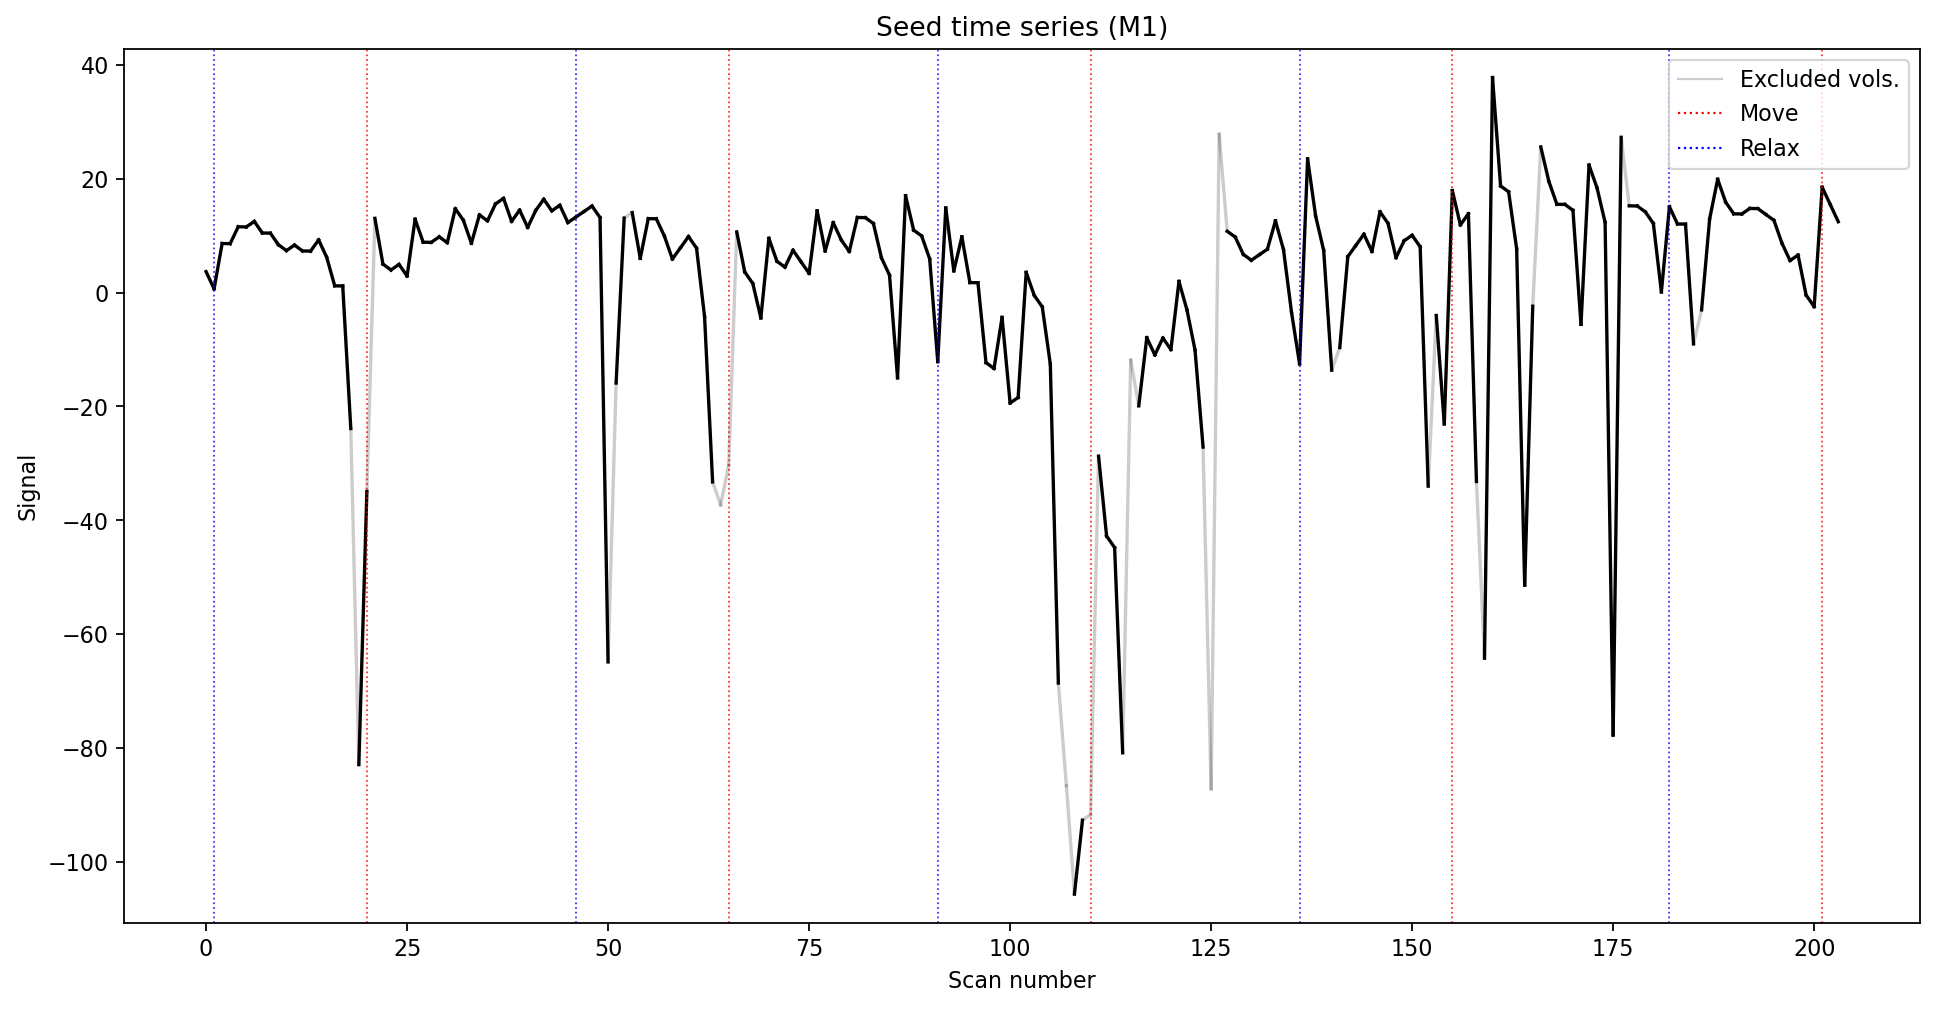

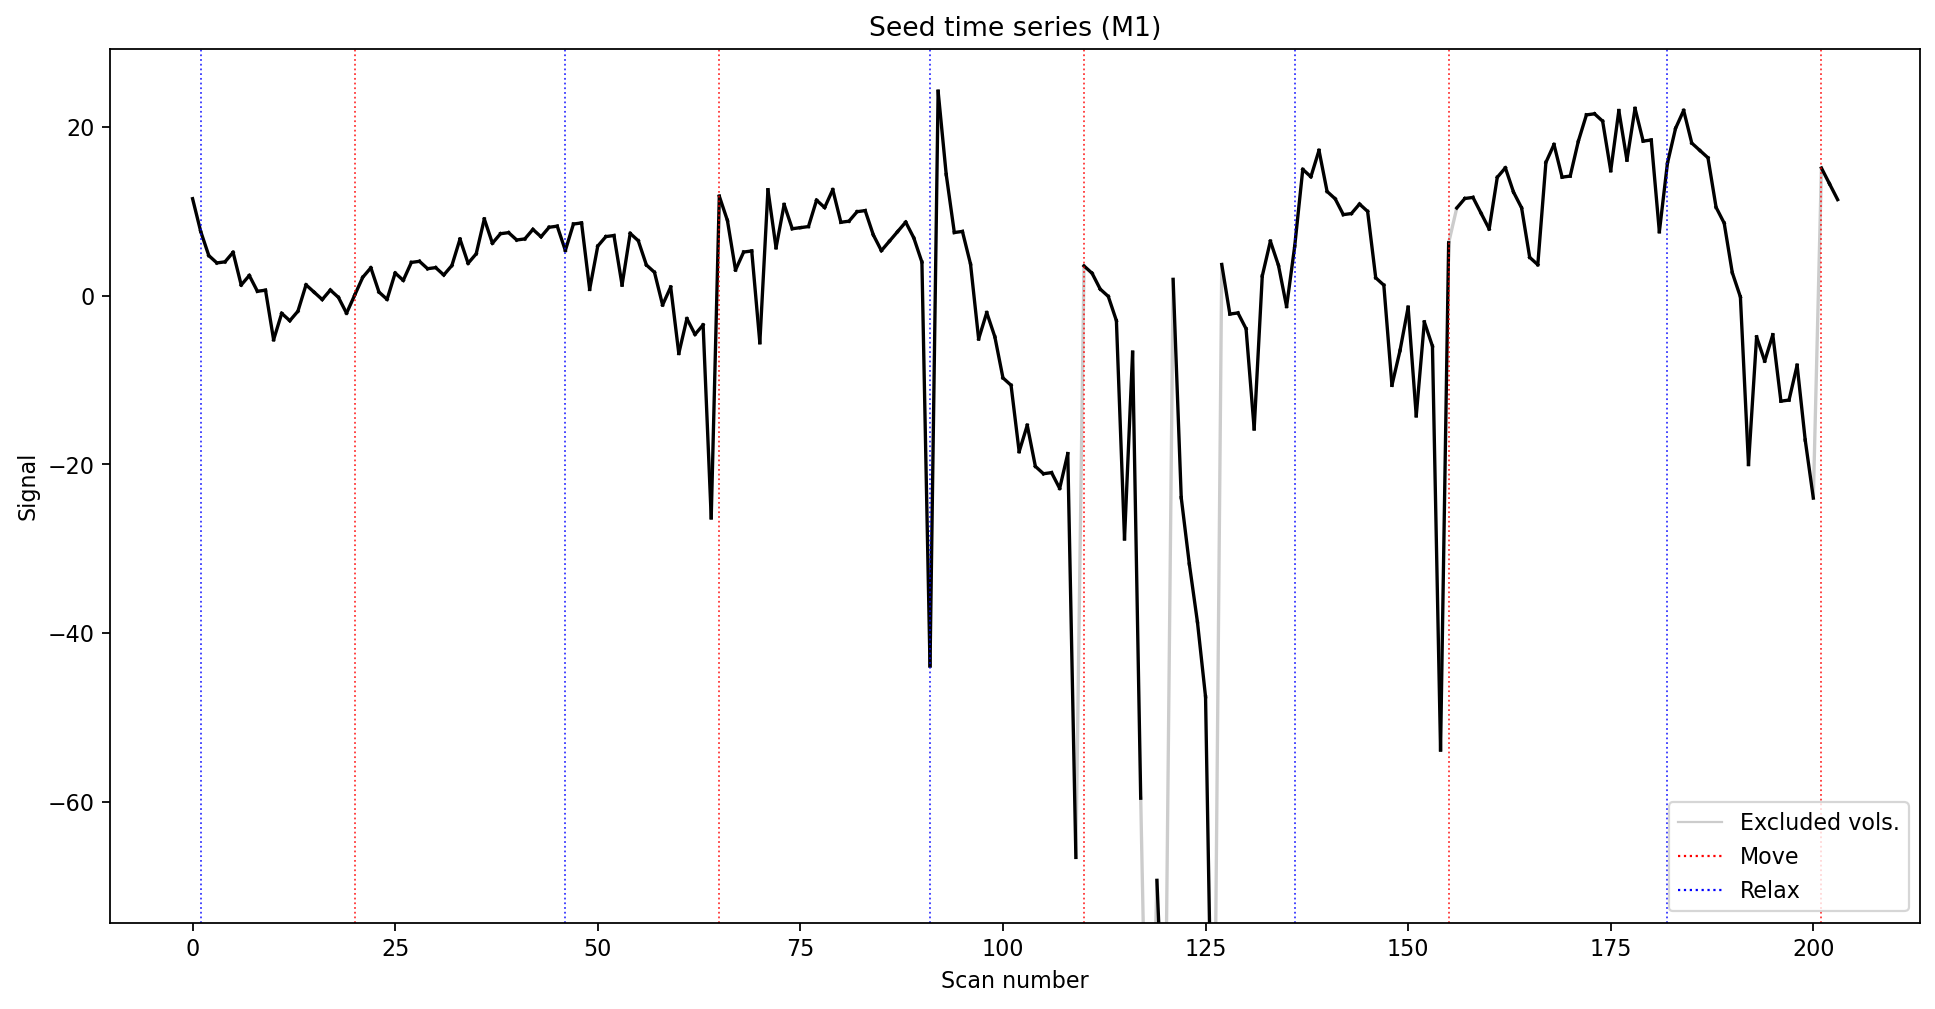

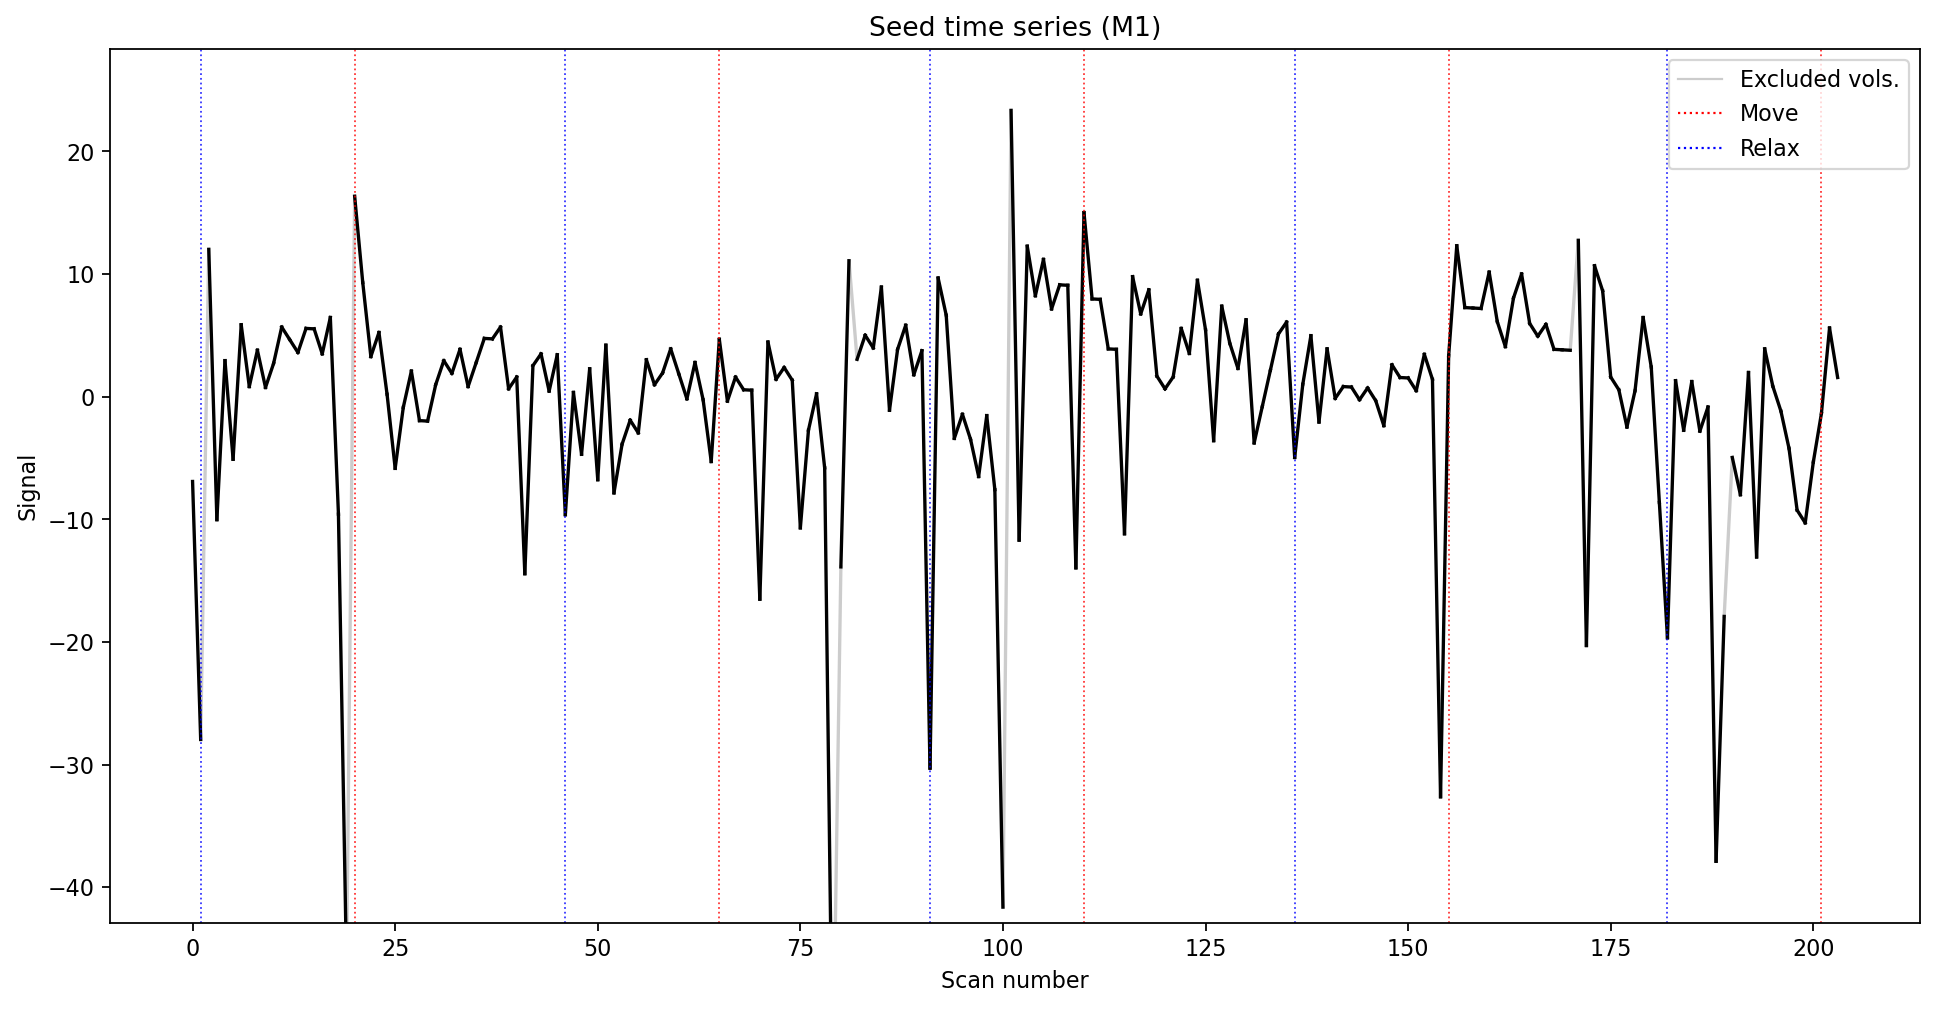

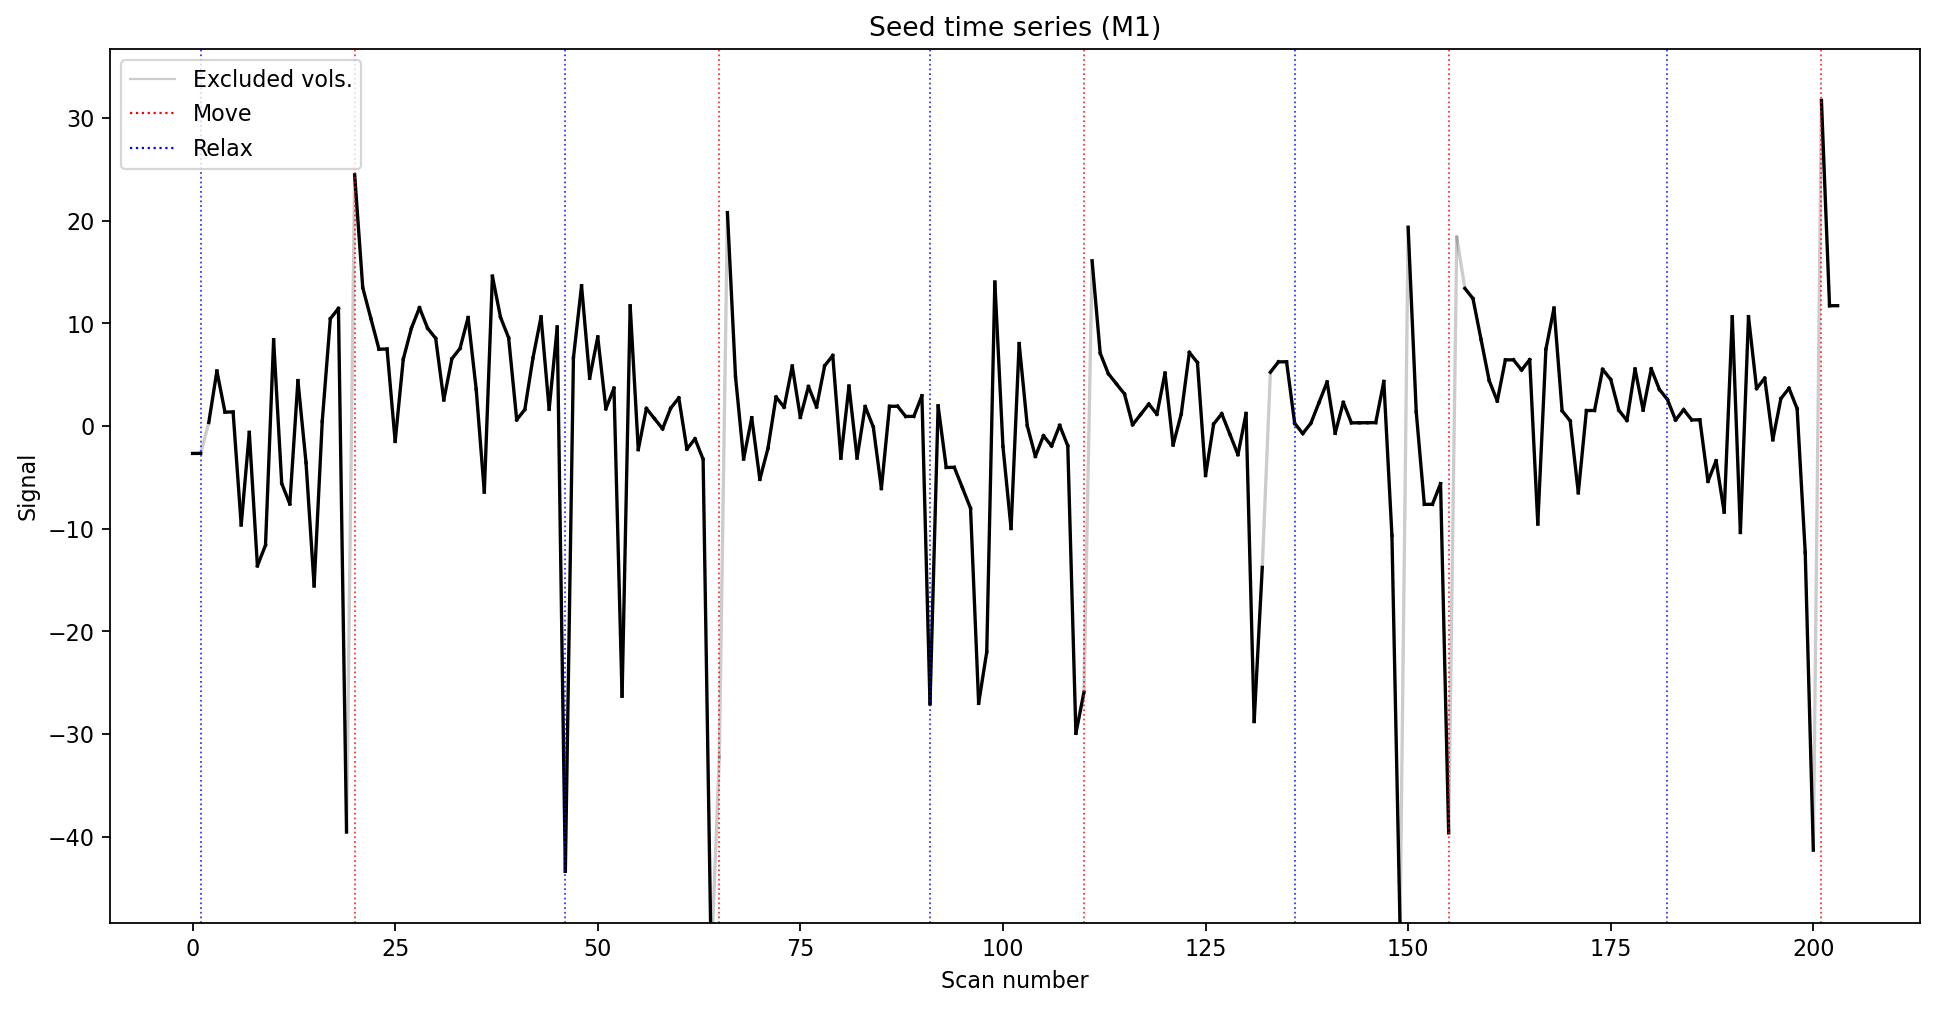

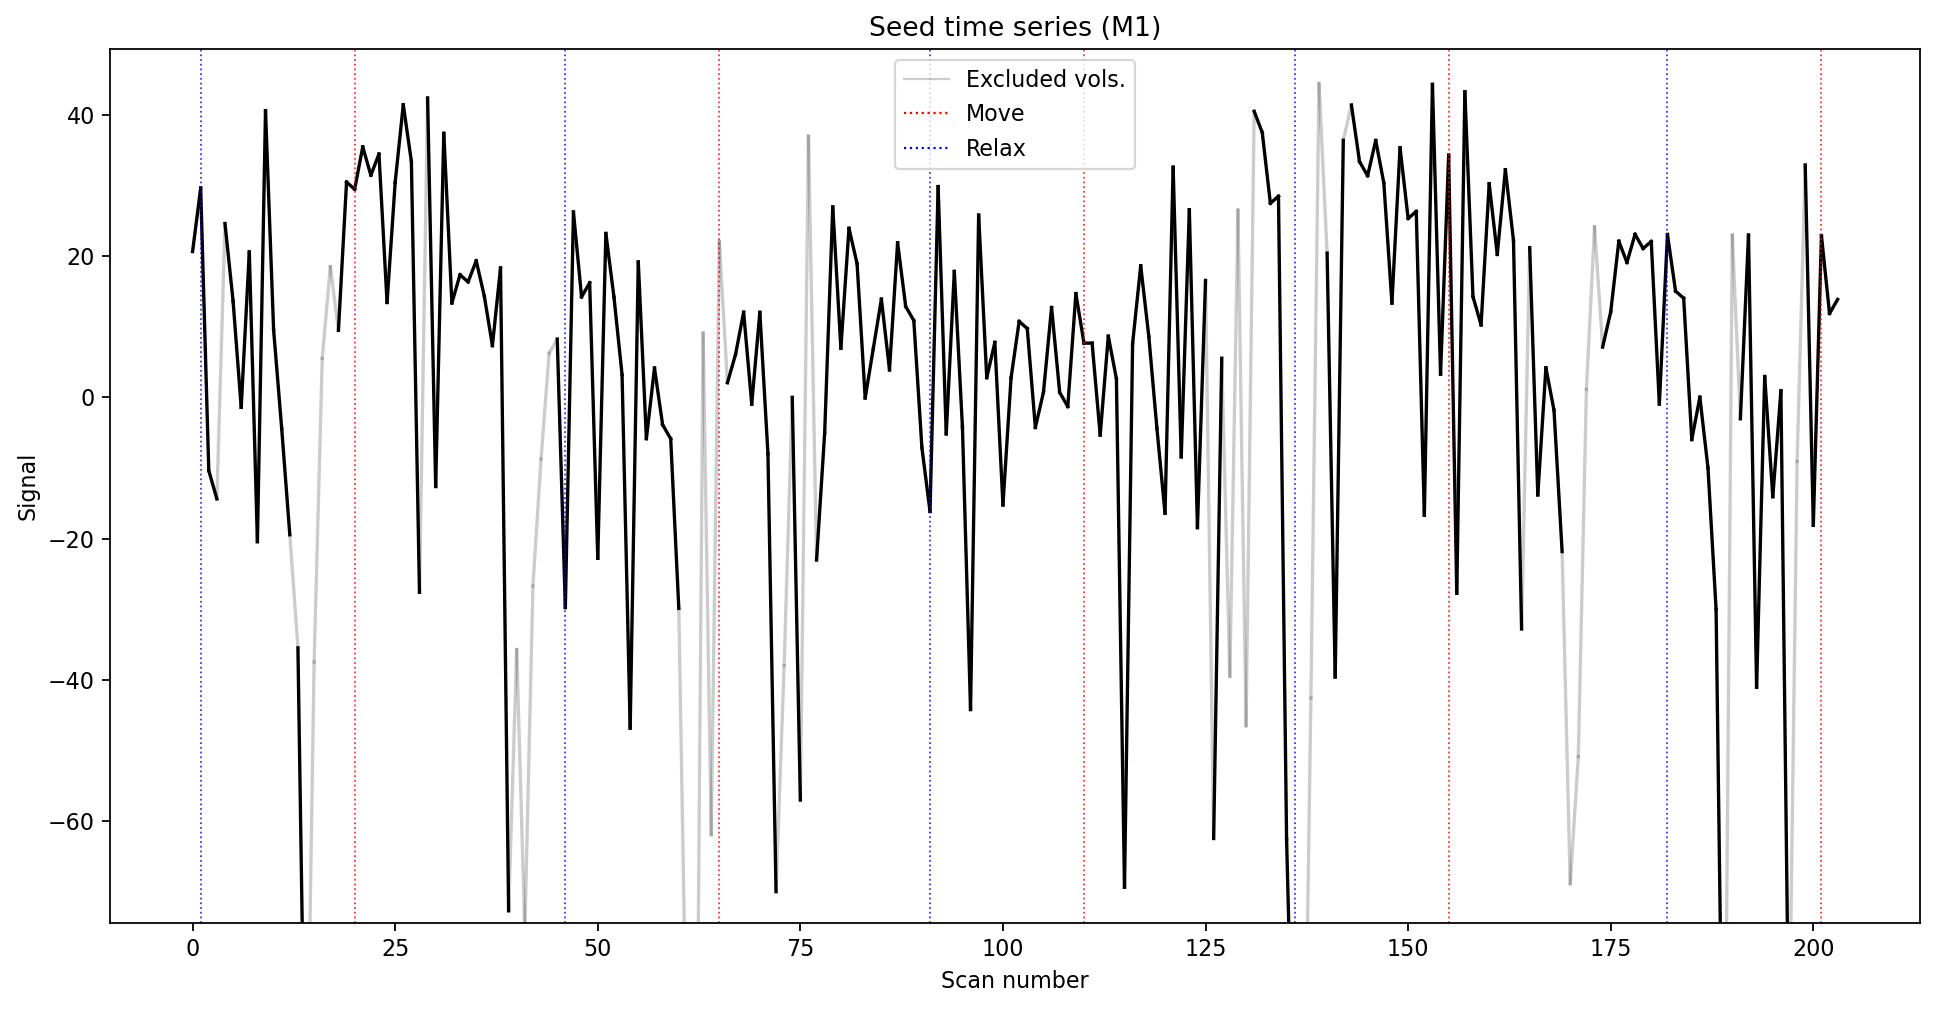

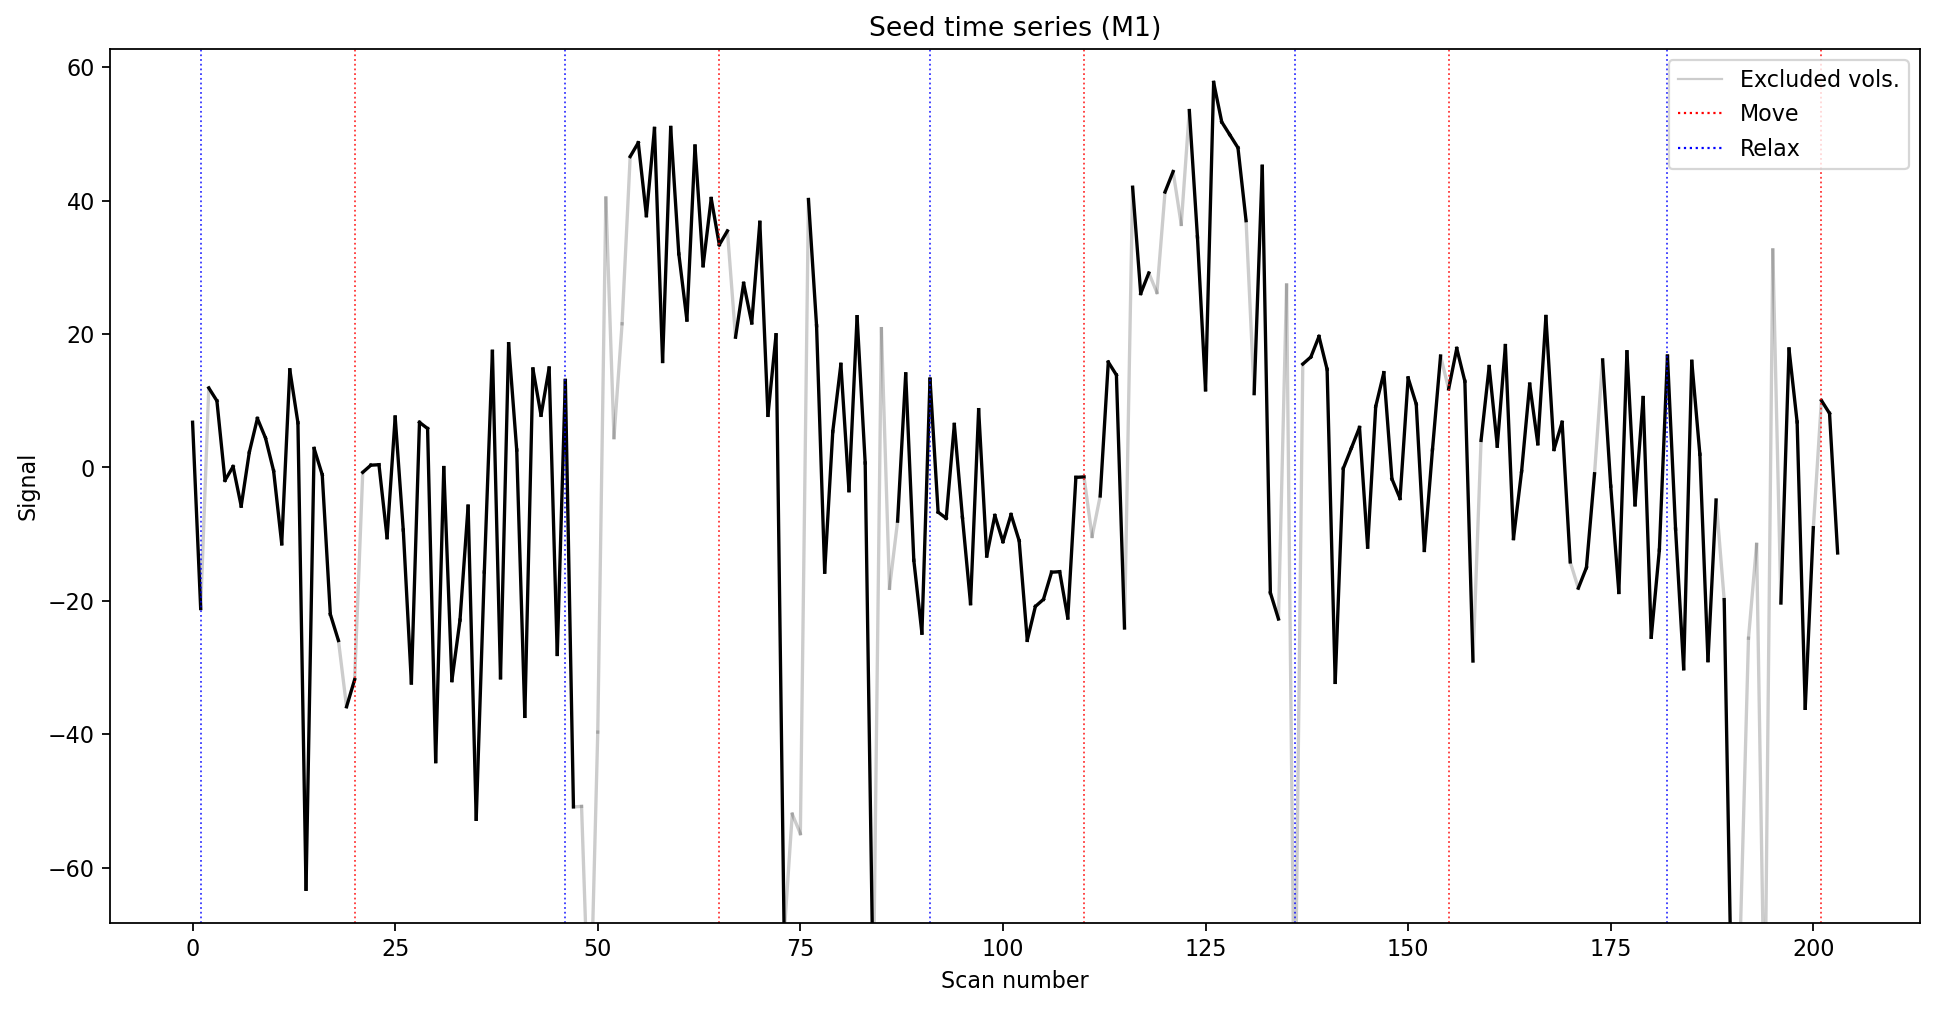

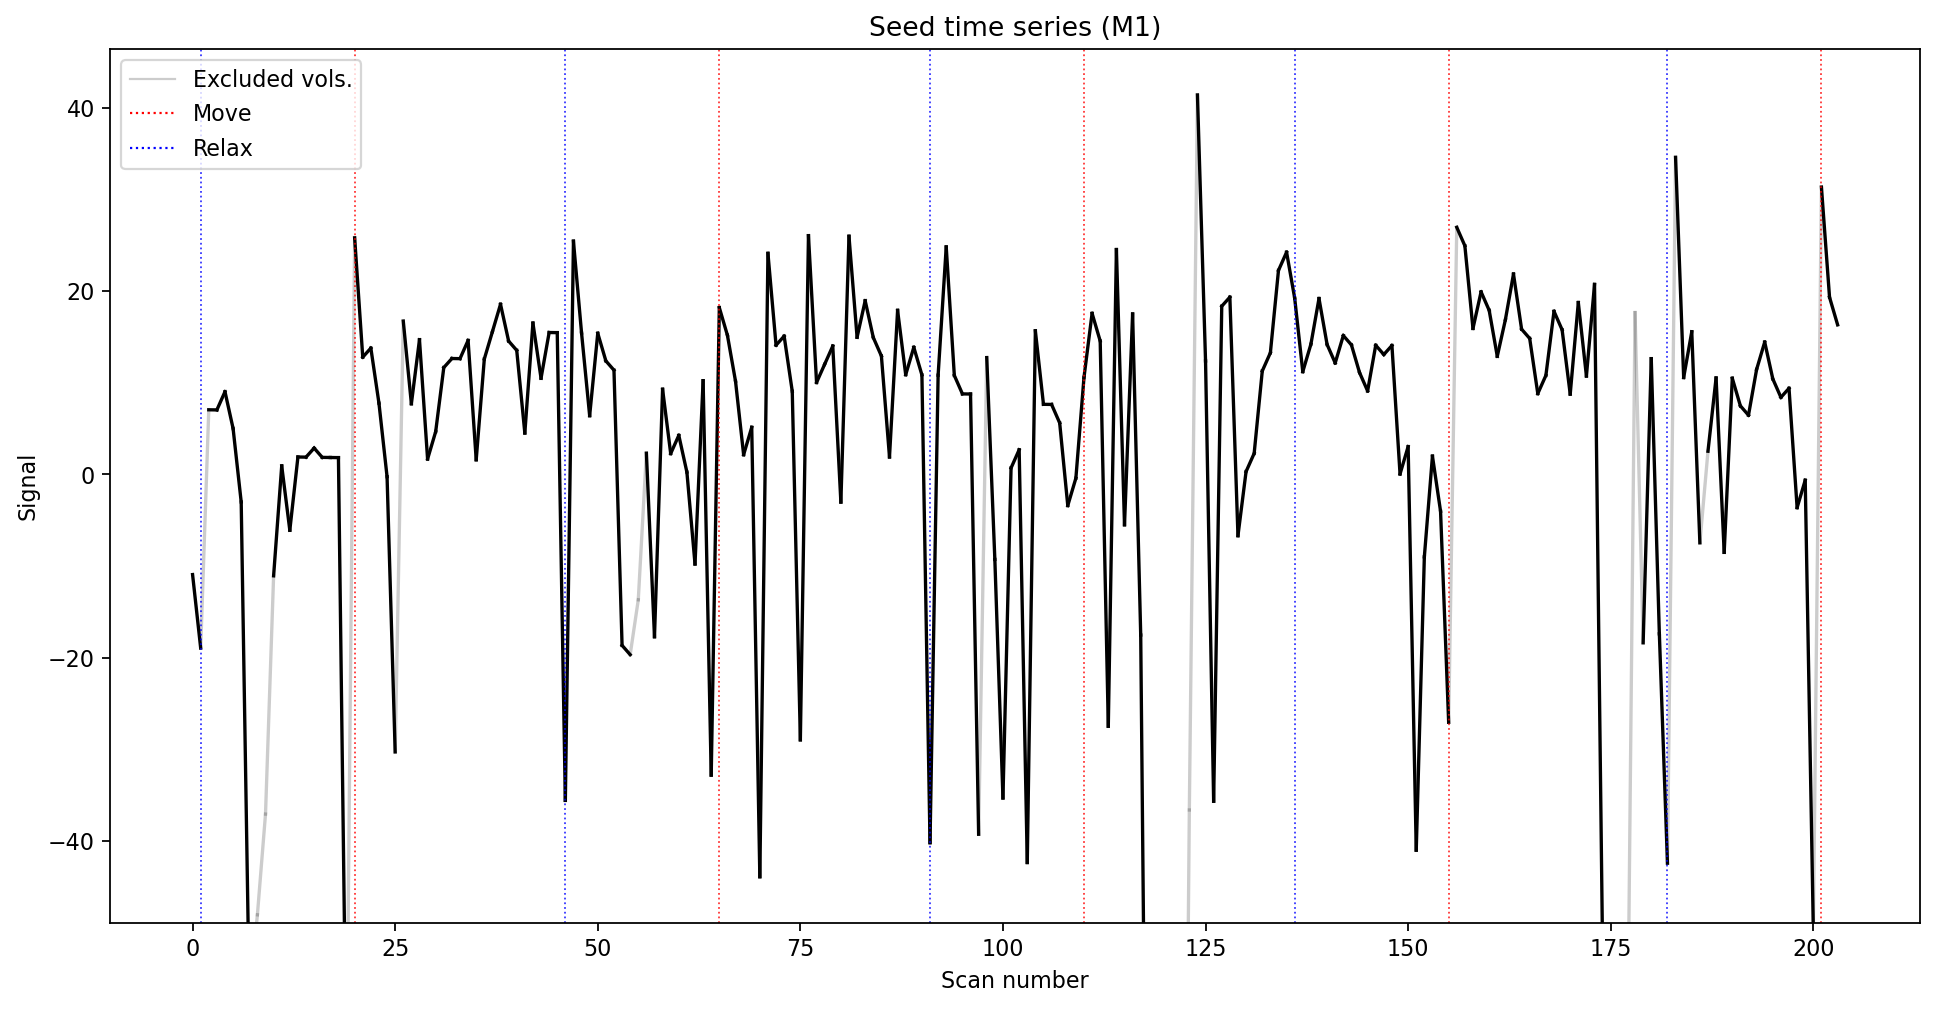

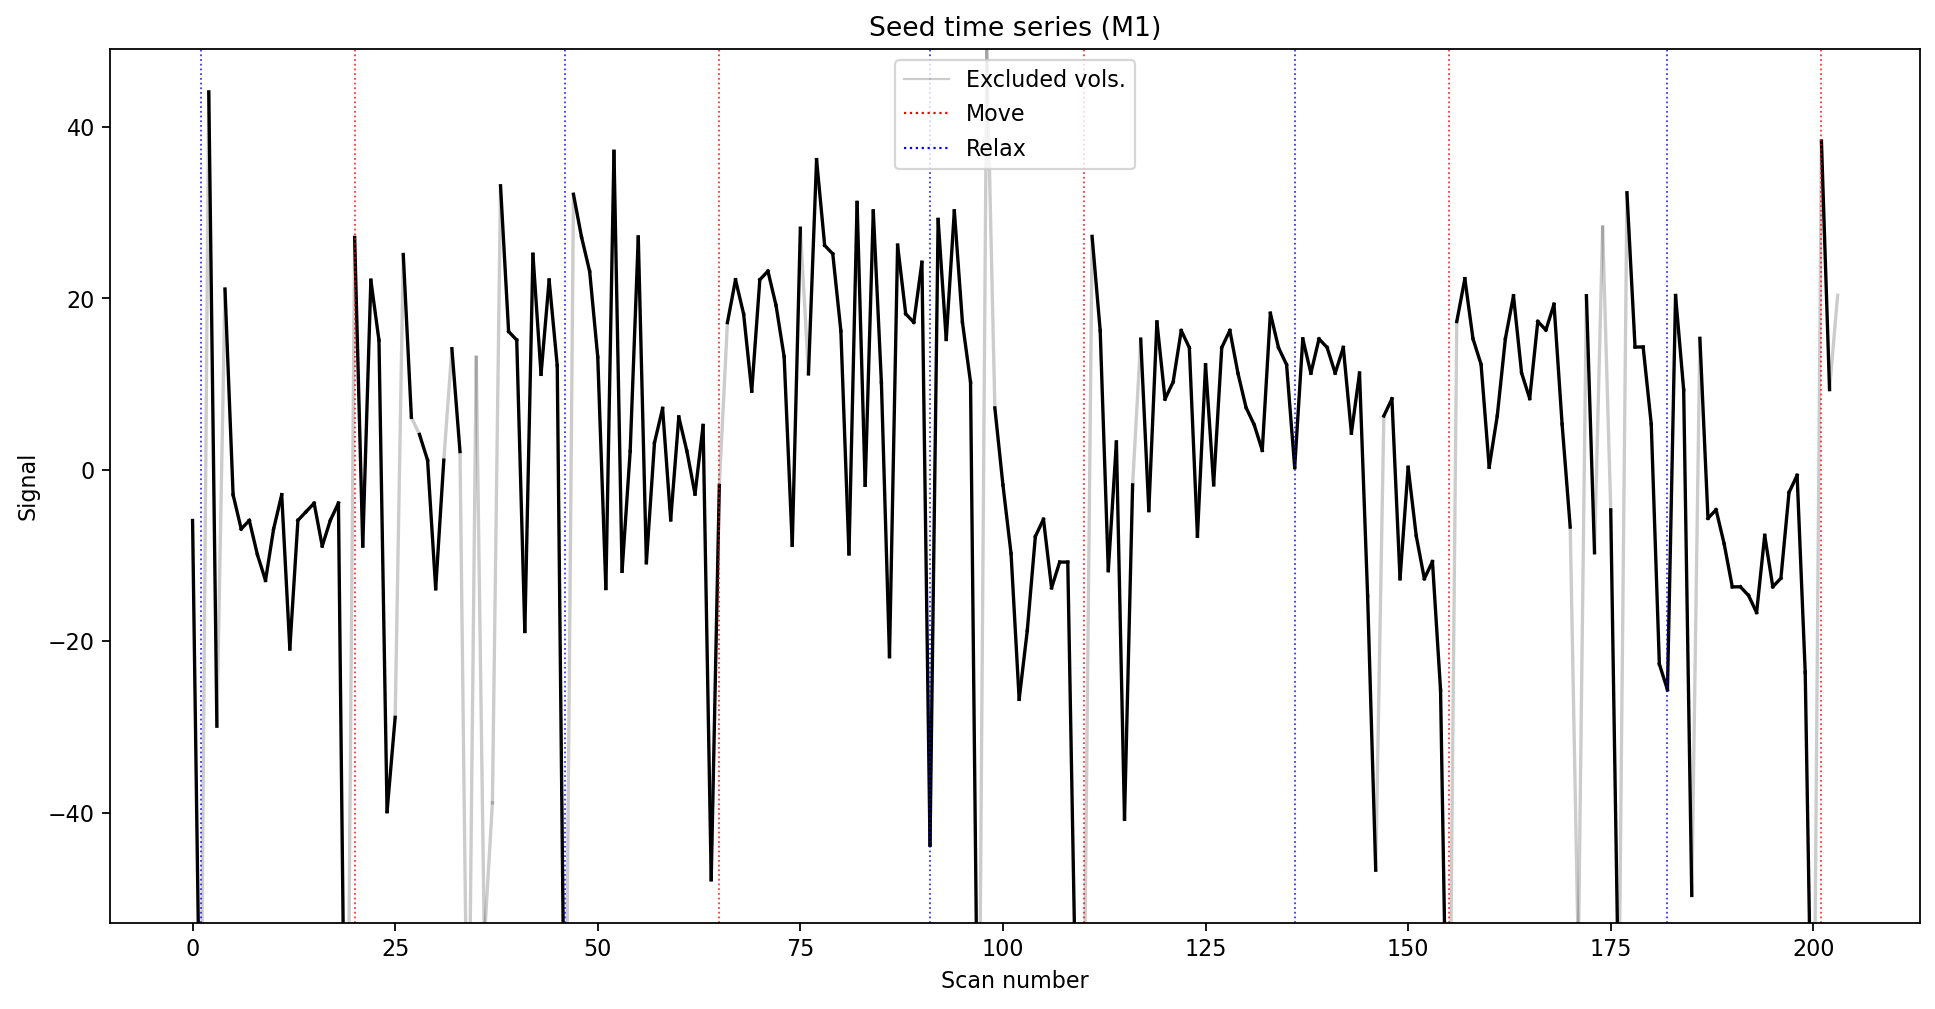

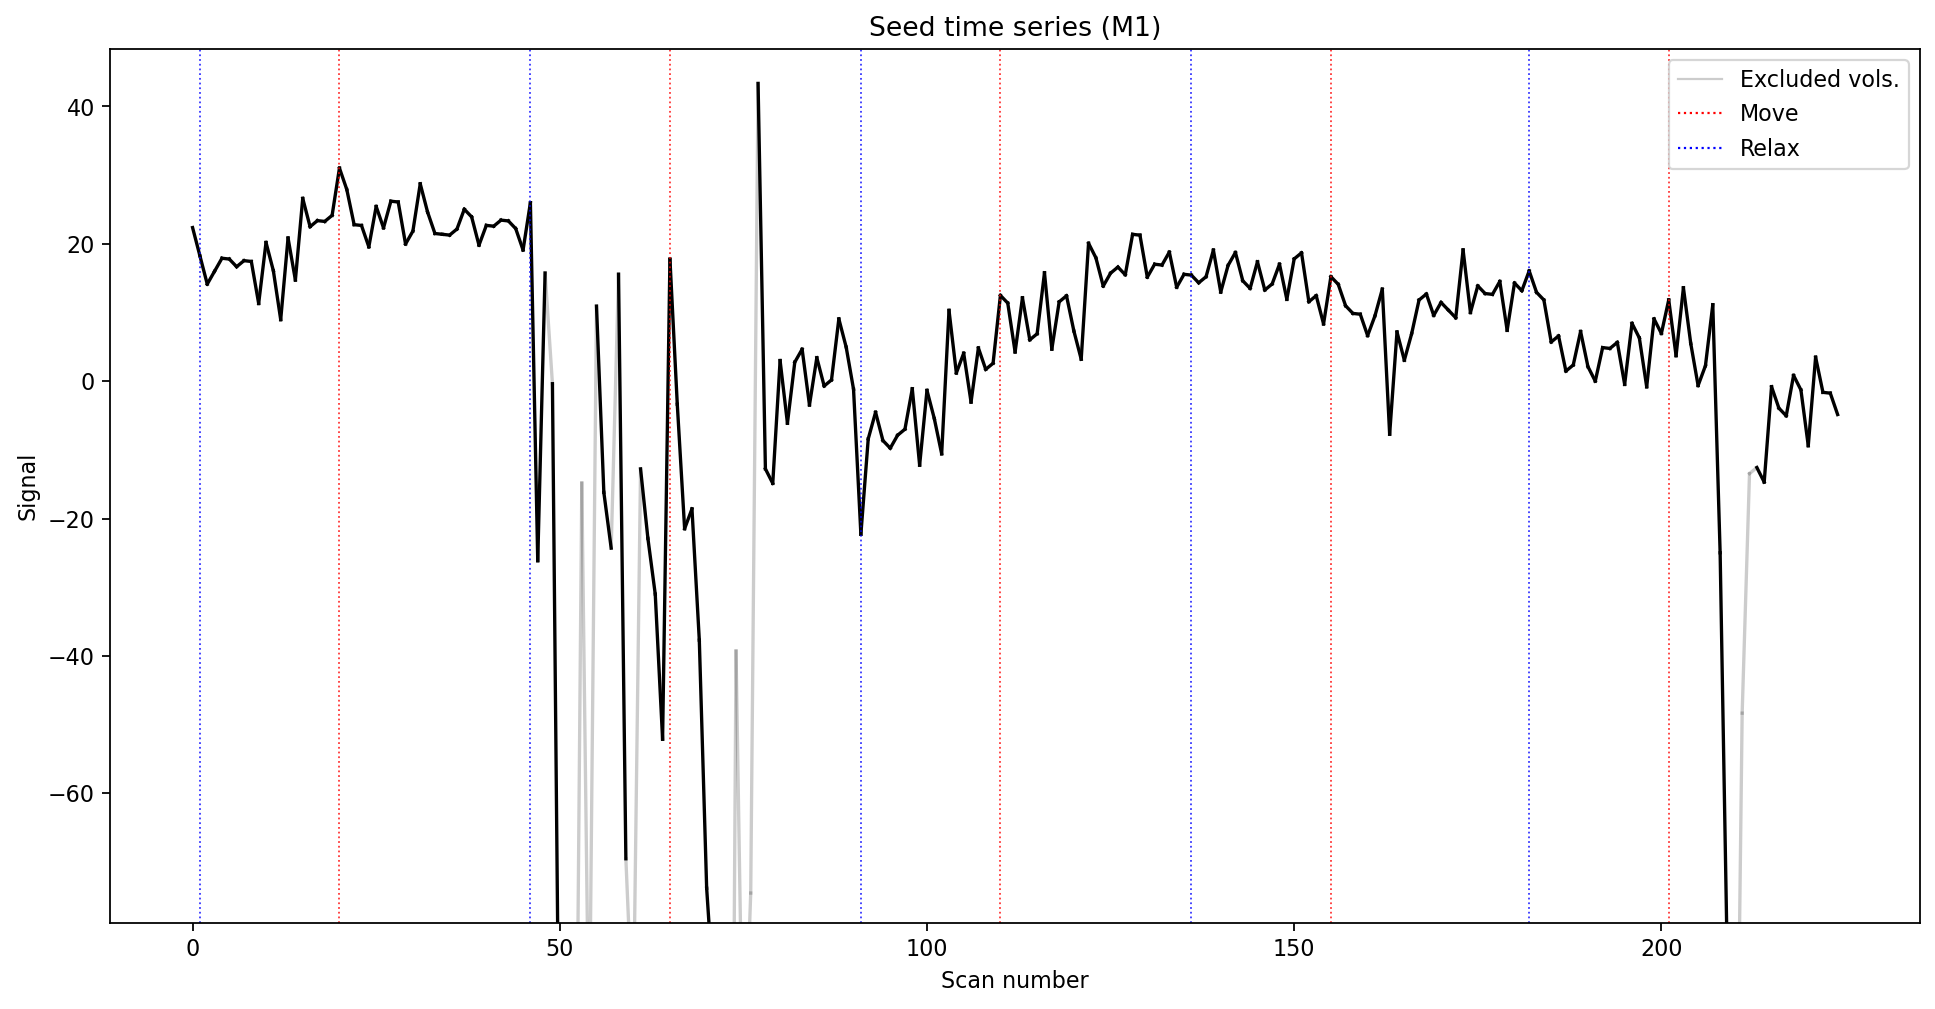

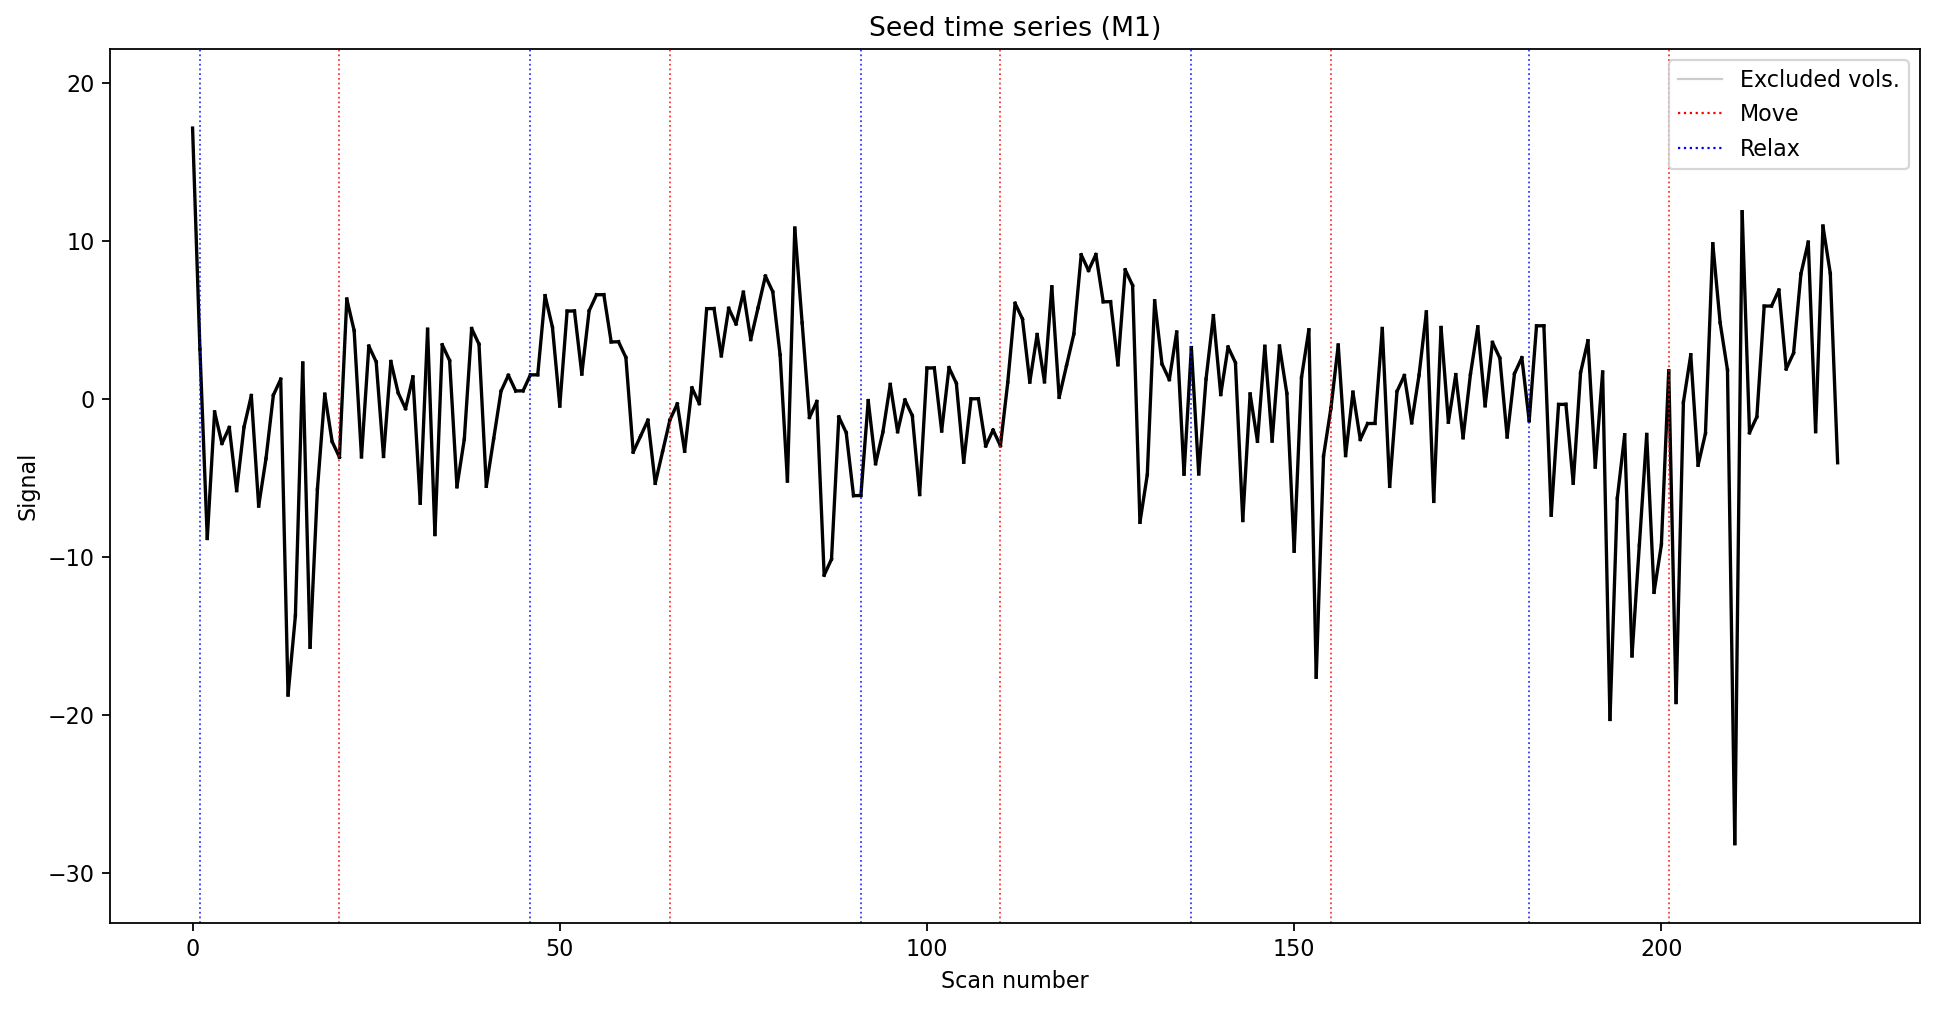

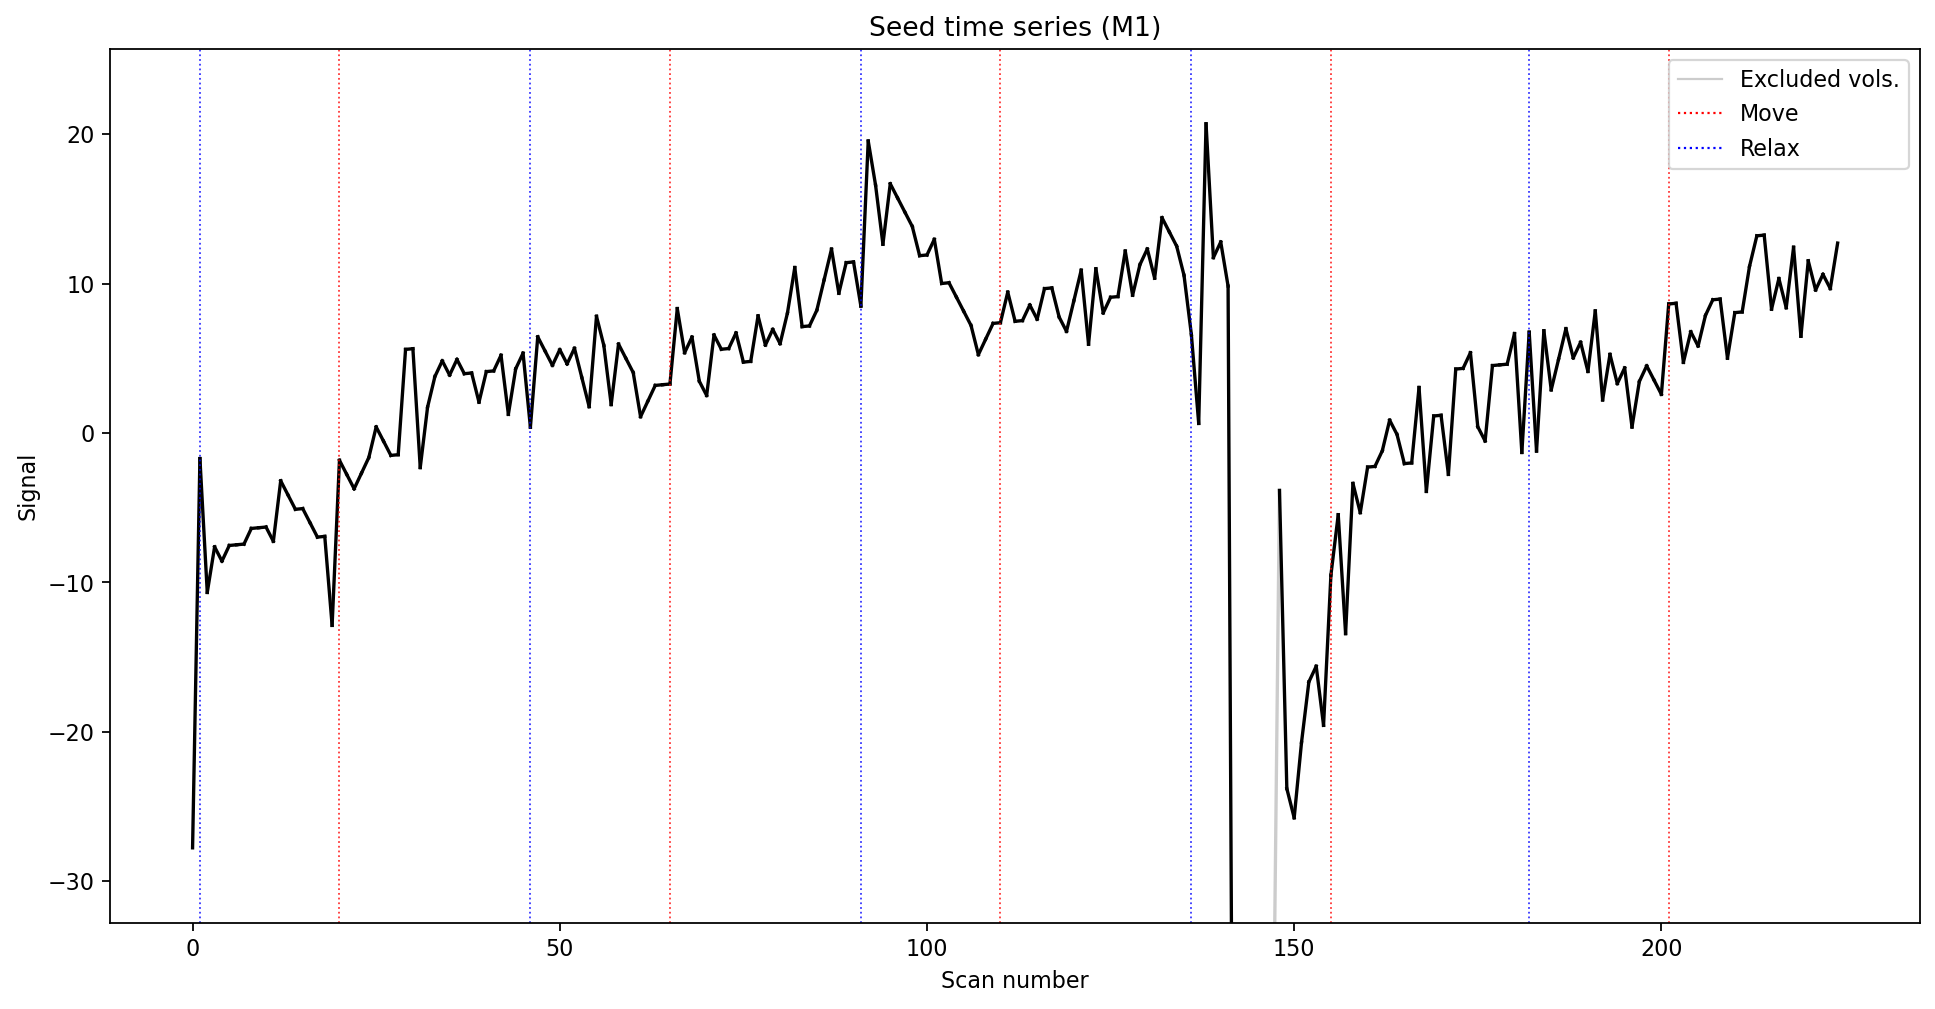

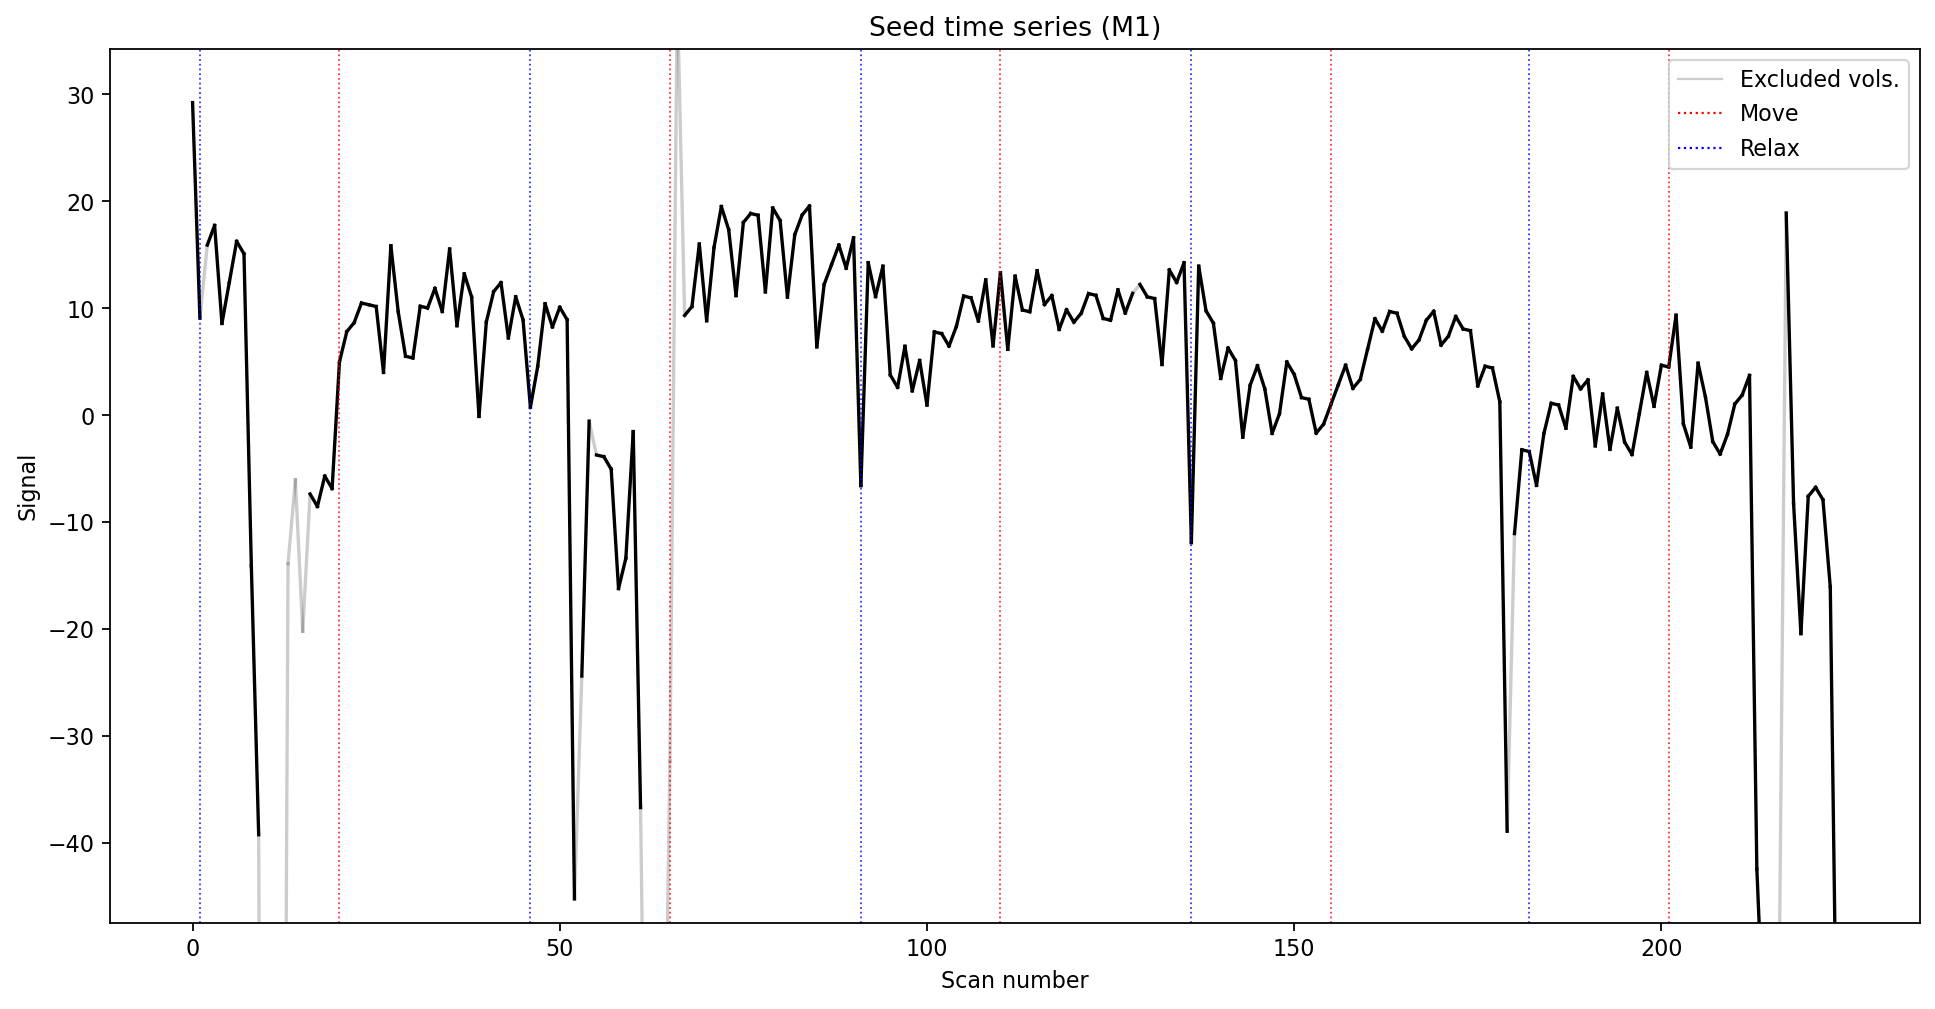

In [56]:
c = (-25,-33,37) # centre seed
mm = 12 # mm sphere

# week 02
plot_time_series_from_sphere(scan_data1, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp1, detrend = True)
plt.savefig('w02_d01_pre.jpg', dpi=300)
plt.show()

plot_time_series_from_sphere(scan_data2, events, events_relax,  c, mm, 'Seed time series (M1)', rp = rp2, detrend = True)
plt.savefig('w02_d01_post.jpg', dpi=300)
plt.show()

plot_time_series_from_sphere(scan_data3, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp3, detrend = True)
plt.savefig('w02_d05_pre.jpg', dpi=300)
plt.show()

plot_time_series_from_sphere(scan_data4, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp4, detrend = True)
plt.savefig('w02_d05_post.jpg', dpi=300)
plt.show()

# week 04
plot_time_series_from_sphere(scan_data5, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp5, detrend = True)
plt.savefig('w04_d01_pre.jpg', dpi=300)
plt.show()

plot_time_series_from_sphere(scan_data6, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp6, detrend = True)
plt.savefig('w04_d01_post.jpg', dpi=300)
plt.show()

plot_time_series_from_sphere(scan_data7, events, events_relax, c, mm, 'Seed time series (M1)',rp = rp7, detrend = True)
plt.savefig('w04_d05_pre.jpg', dpi=300)
plt.show()

plot_time_series_from_sphere(scan_data8, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp8, detrend = True)
plt.savefig('w04_d05_post.jpg', dpi=300)
plt.show()

# week 06
plot_time_series_from_sphere(scan_data9, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp9, detrend = True)
plt.savefig('w06_d01_pre.jpg', dpi=300)
plt.show()

plot_time_series_from_sphere(scan_data10, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp10, detrend = True)
plt.savefig('w06_d01_post.jpg', dpi=300)
plt.show()

plot_time_series_from_sphere(scan_data11, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp11, detrend = True)
plt.savefig('w06_d05_pre.jpg', dpi=300)
plt.show()

plot_time_series_from_sphere(scan_data12, events, events_relax, c, mm, 'Seed time series (M1)', rp = rp12, detrend = True)
plt.savefig('w06_d05_post.jpg', dpi=300)
plt.show()
